In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv("dataset_Facebook.csv")

In [3]:
data = pd.read_csv("dataset_Facebook.csv", delimiter=';')
df=data.copy()

In [4]:
X = df[["Category","Paid","Lifetime Post Total Reach","Lifetime Post Total Impressions","Lifetime Engaged Users","Post Month", "Post Hour", "Paid"]] #bağımsız değişkenleri x e 
Y = df[["Total Interactions"]] #bağımlı değişkenleri y ye atıyoruz

In [5]:
plt.importance_(cart_final,X)

AttributeError: module 'matplotlib.pyplot' has no attribute 'importance_'

In [ ]:
cart_final.features_importances_

In [ ]:
def plot_importance (model, features, num=len(X), save=False):
feature_imp = pd.DataFrame({'Value': model.feature_importances_,'Feature': features.columns})
plt. figure(figsize=(10, 10))
sns. set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=fe Video Lessonjmp. sort_values(by="Value",
ascending=False) [0:num])

plt.title('Features')
plt. tight_layout()
plt. show()


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# 'Type' sütununu nümerik hale getir
type_numerik = {"Photo": 1, "Status": 2, "Video": 3}
df['Type'] = df['Type'].map(type_numerik)

In [ ]:
df.head()

In [6]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
Page total likes,500.0,123194.176000,16272.813214,81370.0,112676.00,129600.0,136393.00,139441.0
Category,500.0,1.880000,0.852675,1.0,1.00,2.0,3.00,3.0
Post Month,500.0,7.038000,3.307936,1.0,4.00,7.0,10.00,12.0
Post Weekday,500.0,4.150000,2.030701,1.0,2.00,4.0,6.00,7.0
Post Hour,500.0,7.840000,4.368589,1.0,3.00,9.0,11.00,23.0
Paid,499.0,0.278557,0.448739,0.0,0.00,0.0,1.00,1.0
Lifetime Post Total Reach,500.0,13903.360000,22740.787890,238.0,3315.00,5281.0,13168.00,180480.0
Lifetime Post Total Impressions,500.0,29585.948000,76803.246670,570.0,5694.75,9051.0,22085.50,1110282.0
Lifetime Engaged Users,500.0,920.344000,985.016636,9.0,393.75,625.5,1062.00,11452.0
Lifetime Post Consumers,500.0,798.772000,882.505013,9.0,332.50,551.5,955.50,11328.0


In [7]:
df.isna().values.any() # veri setinde eksik değer var

True

In [8]:
df.isna().sum() # paid,like 

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [9]:
df.isna().values #Missing values may not be fully ımputed here

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Page total likes

In [10]:
df=df.rename(columns={"Page total likes":"PageTotalLikes"})

In [11]:
df.PageTotalLikes.value_counts()

PageTotalLikes
136393    18
124940    17
129600    15
139441    14
138895    14
          ..
93470      1
127082     1
93684      1
133451     1
93577      1
Name: count, Length: 90, dtype: int64

## Type

In [12]:
df.Type.value_counts() #kaç farklı type var ve her type'ın toplam sayısı

Type
Photo     426
Status     45
Link       22
Video       7
Name: count, dtype: int64

In [13]:
df.Type.value_counts().sum() #toplam type sayısı 

500

In [14]:
df.Category.value_counts()

Category
1    215
3    155
2    130
Name: count, dtype: int64

# VERİ SETİNİN AÇIKLAMASI 

Page total likes : Facebook sayfasının toplam beğeni sayısı
Type : type değişkeninin 4 farklı kategorisi var toplam 500 olmak üzere post'ların türünü belirliyen

Photo     426
Status     45
Link       22
Video       7 

Category:

Kategori: Gönderi ile ilişkilendirilmiş sayısal bir kategori.
Gönderi Ayı: Gönderinin yapıldığı ay.
Gönderi Hafta Günü: Gönderinin yapıldığı haftanın günü.
Gönderi Saati: Gönderinin yapıldığı günün saati.
Ücretli: Gönderinin ücretli bir tanıtım olup olmadığını belirten bir işaret (1 ücretli, 0 ücretsiz).
Toplam Yaşam Boyu Erişim: Gönderiyi gören benzersiz kullanıcıların toplam sayısı.
Toplam Yaşam Boyu İzlenim: Gönderinin kaç kez görüntülendiğinin toplam sayısı.
Yaşam Boyu Etkilenen Kullanıcılar: Gönderiyle etkileşime giren kullanıcıların toplam sayısı (örneğin, tıklama, beğenme, paylaşma).
Yaşam Boyu Gönderi Tüketenler: Gönderiye tıklayan veya içeriğini tüketen kullanıcıların sayısı.
Yaşam Boyu Gönderi Tüketimleri: Gönderiye yapılan toplam tıklama sayısı.
Beğenen Sayfayı Beğenenlerin Yaşam Boyu Gönderi İzlenimleri: Sayfayı beğenen kullanıcılardan gelen izlenimler.
Sayfanızı Beğenen Kullanıcıların Yaşam Boyu Gönderi Erişimi: Sayfayı beğenen kullanıcılardan gelen erişim.
Sayfanızı Beğenen ve Gönderinizle Etkileşimde Bulunan Kullanıcılar: Sayfayı beğenen ve gönderiyle etkileşimde bulunan kullanıcılar.
Yorum: Gönderide yapılan yorum sayısı.
Beğeni: Gönderiye yapılan beğeni sayısı.
Paylaşım: Gönderinin aldığı paylaşım sayısı.
Toplam Etkileşim: Etkileşim sayısının toplamı (yorum, beğeni ve paylaşımın toplamı).

In [15]:
#df.drop(df.iloc[:, 7:18], inplace = True, axis = 1) #istenilen değişkenlerle yola devam
df

,PageTotalLikes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [16]:
df = df.dropna(subset=['Paid']) #eksik olan değerimizi sildik 

In [17]:
def covert_weekdays(x):
    if x == 1:
        return 'Sunday'
    elif x== 2:
        return 'Monday'
    elif x == 3:
        return 'Tuesday'
    elif x == 4:
        return 'Wendesday'
    elif x == 5:
        return 'Thursday'
    elif x ==6:
        return 'Friday'
    elif x == 7:
        return "Saturay"
    
df['Weekday'] = df['Post Weekday'].apply(lambda x: covert_weekdays(x))

/var/folders/bg/7kqfw1hj6llfv4z2gzk8mqhr0000gn/T/ipykernel_38679/3057529152.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Post Weekday'].apply(lambda x: covert_weekdays(x))


In [18]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

data = pd.read_csv("dataset_Facebook.csv", delimiter=';')
df=data.copy()

type_numerik = {"Photo": 1, "Status": 2, "Video": 3}
df['Type'] = df['Type'].map(type_numerik)

df=df.rename(columns={"Page total likes":"PageTotalLikes"})

df1 = df.drop(df.iloc[:, 7:18], axis = 1)
#df2 = df1.dropna(subset=['Paid', 'Type'])
df2 = df1.dropna()
df2.head()

cor = []
for column in df2.columns:
    cor.append(df2[column].corr(df2['Total Interactions']))

print(cor)

[0.039593452134101405, 0.015273039142601965, 0.11792901226254238, 0.01654603506802605, -0.07986740588867847, -0.035519611482546294, 0.11168629755876562, 1.0]


In [19]:
df

,PageTotalLikes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1.0,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2.0,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1.0,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1.0,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1.0,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,1.0,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,1.0,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,1.0,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,1.0,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [20]:
df.drop("Weekday", axis=1 inplace=True)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (824767999.py, line 1)

In [21]:
dayDf = pd.get_dummies(df['Post Weekday'])
dayDf

,1,2,3,4,5,6,7
0,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,True
496,False,False,False,False,True,False,False
497,False,False,False,False,True,False,False
498,False,False,False,True,False,False,False


In [22]:
X = df[["Category", "Post Month", "Post Hour", "Paid"]] #bağımsız değişkenleri x e 
y = df[["Total Interactions"]] #bağımlı değişkenleri y ye atıyoruz

In [23]:
reg_model.coef_ #5 tane ağırlımız mevcut

NameError: name 'reg_model' is not defined

In [24]:
#daha fazla özellik ekleyerek modelinizi iyileştirebilirsiniz

### Model tahmin denklemi

In [25]:
#Total Interactions = Category*5.66929923e+01 + PageTotalLikes*5.49137029e-03 + Post Month*-2.07510751e+01 + Post Hour*-2.18995111e-01 + Paid*1.02437986e+02

### Modelin Tahmin Başarısını Değerlendirme


In [26]:
# Train RMSE
y_pred = reg_model.predict(x_train)
np.sqrt(mean_squared_error(y_train, y_pred))
#train hatası

NameError: name 'reg_model' is not defined

In [ ]:
# TRAIN RKARE
reg_model.score(x_train, y_train) #test hatası train hatasından yüksek çıkarsa iyi demektir.

In [ ]:
# Test RMSE
y_pred = reg_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
#test hatası

In [ ]:
# Test RKARE  
reg_model.score(x_test, y_test) # bağımsız değişkenleri bağımlı değişkenler üzerinden açıklama gücü

In [ ]:
# 10 Katlı CrossValidation RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,x,y,cv=10,scoring="neg_mean_squared_error")))

In [ ]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,x,y,cv=5,scoring="neg_mean_squared_error")))

In [ ]:
#df.drop(["like","share"], inplace = True, axis = 1) #istenilen değişkenlerle yola devam

In [ ]:
df['like'].fillna(0,inplace=True)
df['share'].fillna(0,inplace=True)
df['Paid'].fillna(0,inplace=True)

# Simple Linear Regression with Gradient Descent from Scratch


In [ ]:
# Cost function MSE
"""
cost fonksiyonun görevi MSE hesaplamak için bütün gözlem birimlerini gezmemiz
ve bir sabit ve agirlik ciftine göre tahmin edilen degerleri hesaplamamiz gerek.
"""
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X.iloc[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse

In [ ]:
# update_weights
"""Simdi bu bütün gözlem birimleri gezilerek belirli bir
agirlik seti oldugunda, bu bütün gözlem birimleri gezilerek ağırlık üzerinde güncellemeler yapılacaktır"""
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X.iloc[i]

        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

In [ ]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters): #epoch sayısı linear reggresiinon da kullanılmaz iterasyon sayısıdır o

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)

        # X DataFrame'inin sıfır indeksli satırına erişmeye çalışan kısım
        # İndeksleme hatasını çözmek için iloc kullanılmalı
        x_row = X.iloc[i]

        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))

    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [ ]:
# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse

# Update weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w


def train(Y, initial_b, initial_w, X, learning_rate, num_iters):
    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)

        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4f}".format(i, b, w, mse))

        cost_history.append(mse)

    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, mse))
    return cost_history, b, w


In [ ]:
# Maliyeti çiz
plt.plot(range(len(cost_history)), cost_history)
plt.title('Cost over iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [ ]:
df.info()

In [39]:
# hyperparameters kullanıcılar tarafından verilir
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

In [40]:
# Veriyi normalize etmek (isteğe bağlı, ancak performansı artırabilir)
X = (df.drop('Total Interactions', axis=1) - df.drop('Total Interactions', axis=1).mean(axis=0)) / df.drop('Total Interactions', axis=1).std(axis=0)
y = df['Total Interactions'].values

In [41]:
train(y, initial_b, initial_w, X, learning_rate, num_iters)

NameError: name 'train' is not defined

In [42]:
X_egitim_bias = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis=1)
cost_history, b, w = train(y_train, initial_b, initial_w, x_train, learning_rate, num_iters)

y_egitim_tahmin = b + np.dot(X_egitim_bias, w)
"""Eğitim verileri üzerinde tahmin yap
X_egitim_bias = np.concatenate([np.ones((x_train.shape[0], 1)), x_train], axis=1)
y_egitim_tahmin = np.dot(X_egitim_bias, theta)"""

NameError: name 'x_train' is not defined

In [43]:
interactions_by_month= df.groupby(['Post Month'])['Total Interactions'].sum().reset_index()
interactions_by_month

,Post Month,Total Interactions
0,1,4015
1,2,6293
2,3,3494
3,4,10876
4,5,9483
5,6,7728
6,7,17082
7,8,7663
8,9,10026
9,10,10974


Text(0.5, 1.0, 'Total interactions by Month')

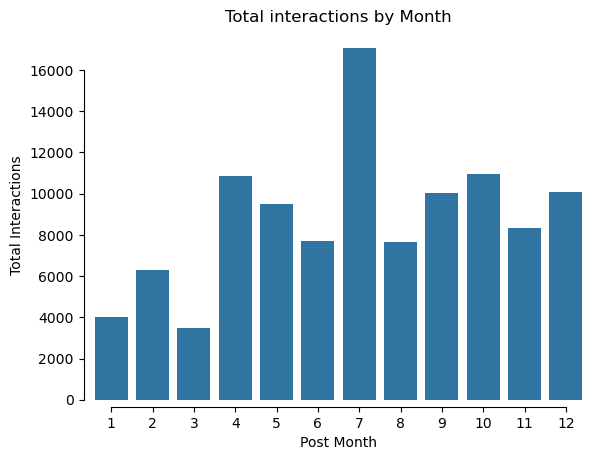

In [44]:
sns.barplot(x='Post Month', y='Total Interactions', data=interactions_by_month)
sns.despine(offset = 5, trim = True)
plt.title("Total interactions by Month")

In [45]:
interactions_by_day= df.groupby(['Post Weekday'])['Total Interactions'].sum().reset_index()
interactions_by_day

,Post Weekday,Total Interactions
0,1,16118
1,2,13230
2,3,18417
3,4,18758
4,5,13756
5,6,13187
6,7,12594


Text(0.5, 1.0, 'Total interactions by weekday')

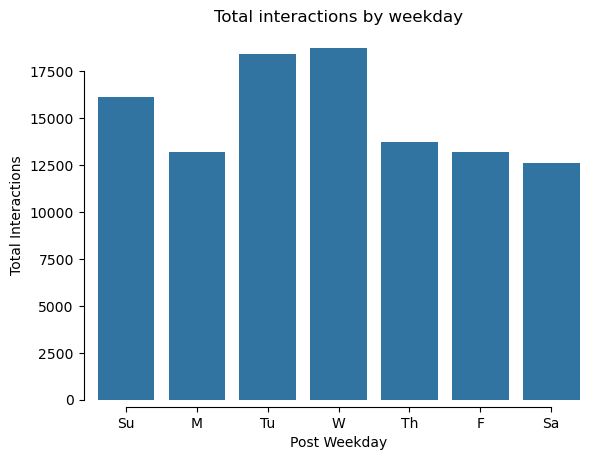

In [46]:
sns.barplot(x='Post Weekday', y='Total Interactions', data=interactions_by_day)
handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
sns.despine(offset = 5, trim = True)
plt.title("Total interactions by weekday")

Text(0.5, 1.0, 'Total interactions by Hour')

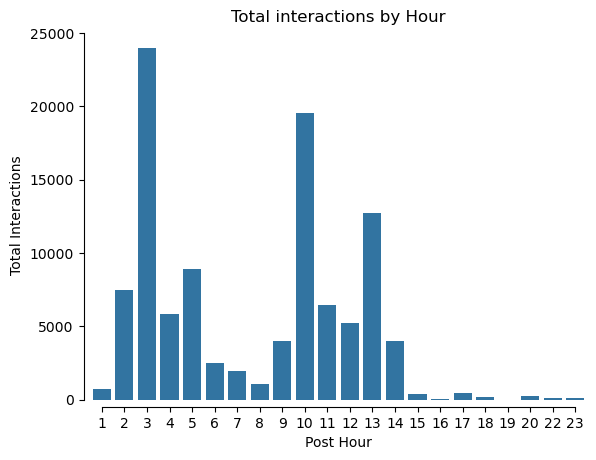

In [47]:
interactions_by_hour= df.groupby(['Post Hour'])['Total Interactions'].sum().reset_index()
sns.barplot(x='Post Hour', y='Total Interactions', data=interactions_by_hour)
sns.despine(offset = 5, trim = True)
plt.title("Total interactions by Hour")

/var/folders/bg/7kqfw1hj6llfv4z2gzk8mqhr0000gn/T/ipykernel_9314/4140924188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Post Hour'],palette='viridis',)


Text(0.5, 1.0, 'Frequency of Posts by Hour')

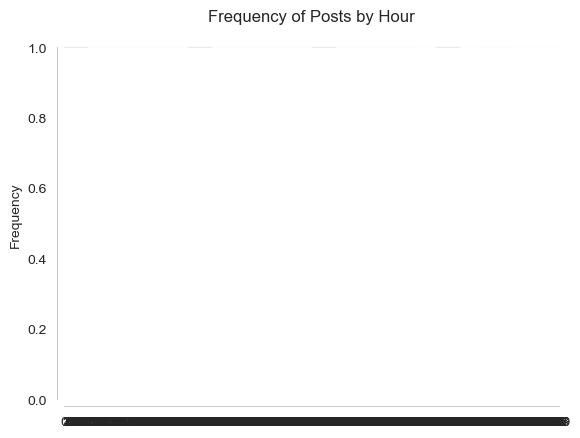

In [48]:
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(df['Post Hour'],palette='viridis',)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Hour")

Text(0.5, 1.0, 'Distribution of Total Interactions by Weekday Posted')

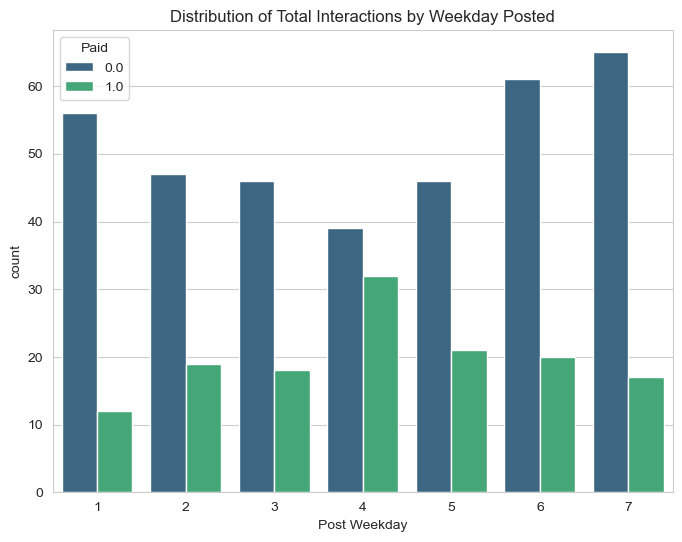

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x='Post Weekday',hue='Paid',data=df,palette='viridis')
plt.title("Distribution of Total Interactions by Weekday Posted")

/var/folders/bg/7kqfw1hj6llfv4z2gzk8mqhr0000gn/T/ipykernel_9314/2353355628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['like']<1000]['like'],bins=20,color='dodgerblue')


Text(0.5, 1.0, 'Distribution of Likes per post')

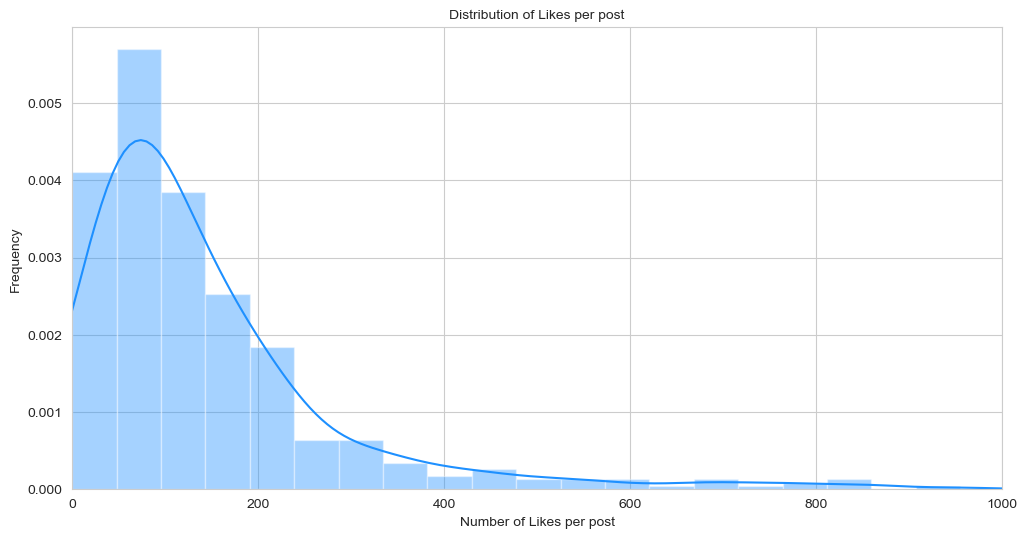

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['like']<1000]['like'],bins=20,color='dodgerblue')
plt.xlim(0,1000)
plt.xlabel("Number of Likes per post",fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Distribution of Likes per post',fontsize=10)

Text(0.5, 1.0, 'Distribution of Total Page Likes')

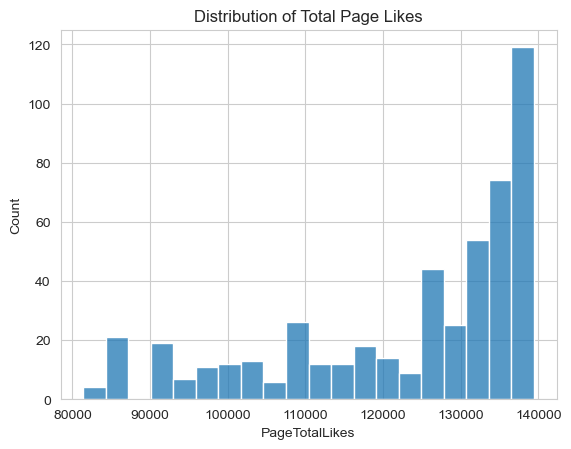

In [51]:
sns.histplot(df['PageTotalLikes'],bins=20)
plt.title("Distribution of Total Page Likes")

Text(0.5, 1.0, '# Page Likes vs. # Post Likes')

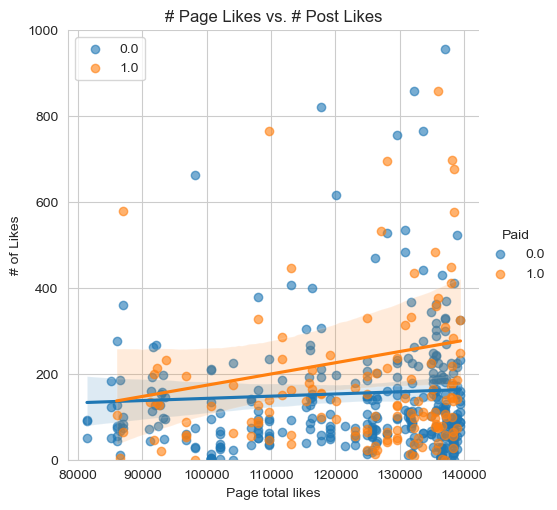

In [64]:
sns.lmplot(x='Page total likes',y='like',
           hue='Paid',data=data,fit_reg=True,
          scatter_kws={'alpha':0.6})
plt.legend()
plt.ylim(0,1000)
plt.ylabel("# of Likes")
plt.title('# Page Likes vs. # Post Likes')
#plt.savefig('pageLikeScatter.png', bbox_inches='tight')

Text(0.5, 1.0, 'Total interactions by Category')

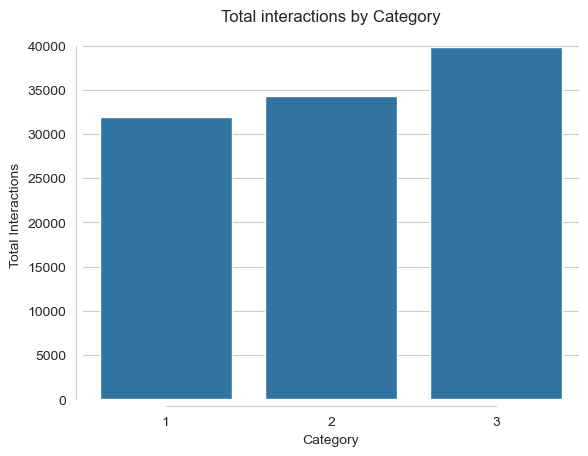

In [65]:
likes_by_category = df.groupby(['Category'])['Total Interactions'].sum().reset_index()
sns.barplot(x='Category', y='Total Interactions', data=likes_by_category)
sns.despine(offset = 5, trim = True)
plt.title("Total interactions by Category")

/var/folders/bg/7kqfw1hj6llfv4z2gzk8mqhr0000gn/T/ipykernel_9314/3805725685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category',y='Total Interactions',data=df,palette='viridis')


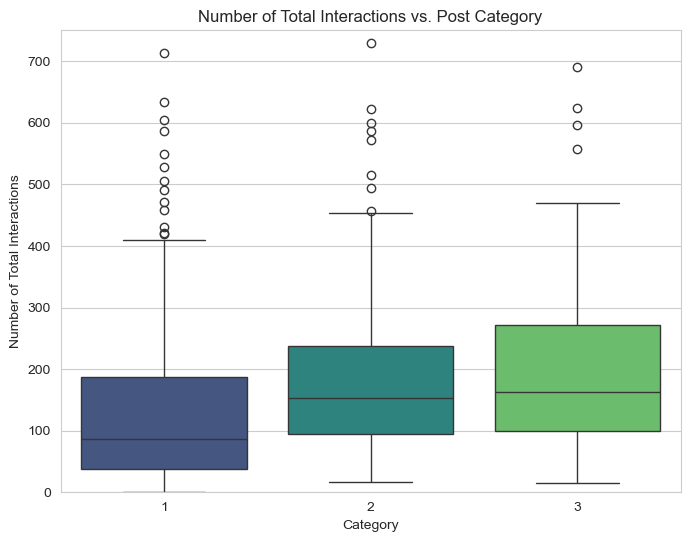

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Total Interactions',data=df,palette='viridis')
plt.ylim(0,750)
plt.ylabel("Number of Total Interactions")
plt.title("Number of Total Interactions vs. Post Category")
plt.savefig('catBox.png', bbox_inches='tight')


Text(0.5, 1.0, 'Total Interactionsper Post by Category and if Posts were Paid')

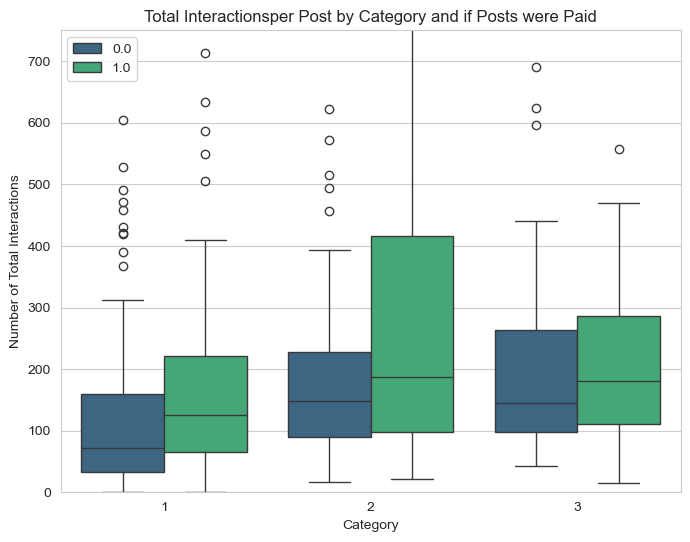

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='Total Interactions',data=df,hue='Paid',palette='viridis')
plt.ylim(0,750)
plt.ylabel("Number of Total Interactions")
plt.legend(loc='upper left')
plt.title("Total Interactionsper Post by Category and if Posts were Paid")


Text(0.5, 1.0, 'Total interactions by Type')

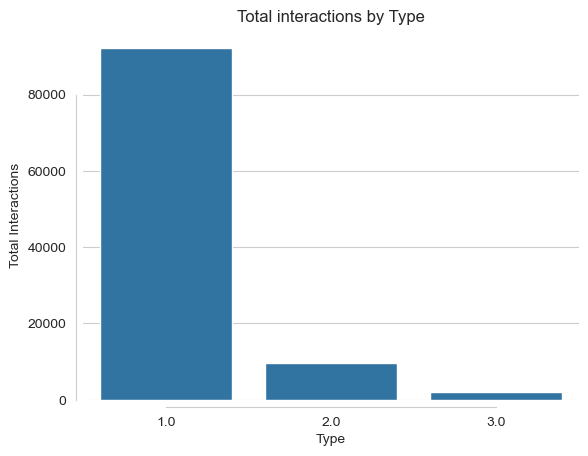

In [68]:
interactions_by_Type = df.groupby(['Type'])['Total Interactions'].sum().reset_index()
sns.barplot(x='Type', y='Total Interactions', data=interactions_by_Type)
sns.despine(offset = 5, trim = True)
plt.title("Total interactions by Type")

/var/folders/bg/7kqfw1hj6llfv4z2gzk8mqhr0000gn/T/ipykernel_9314/1304518646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type',data=df,palette='viridis')


Text(0, 0.5, 'Posts')

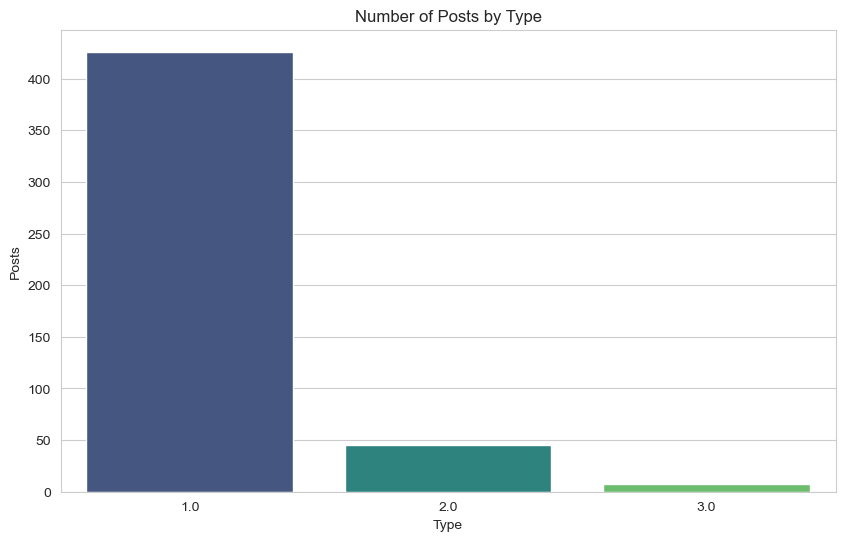

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',data=df,palette='viridis')
plt.title("Number of Posts by Type")
plt.ylabel("Posts")

<Axes: >

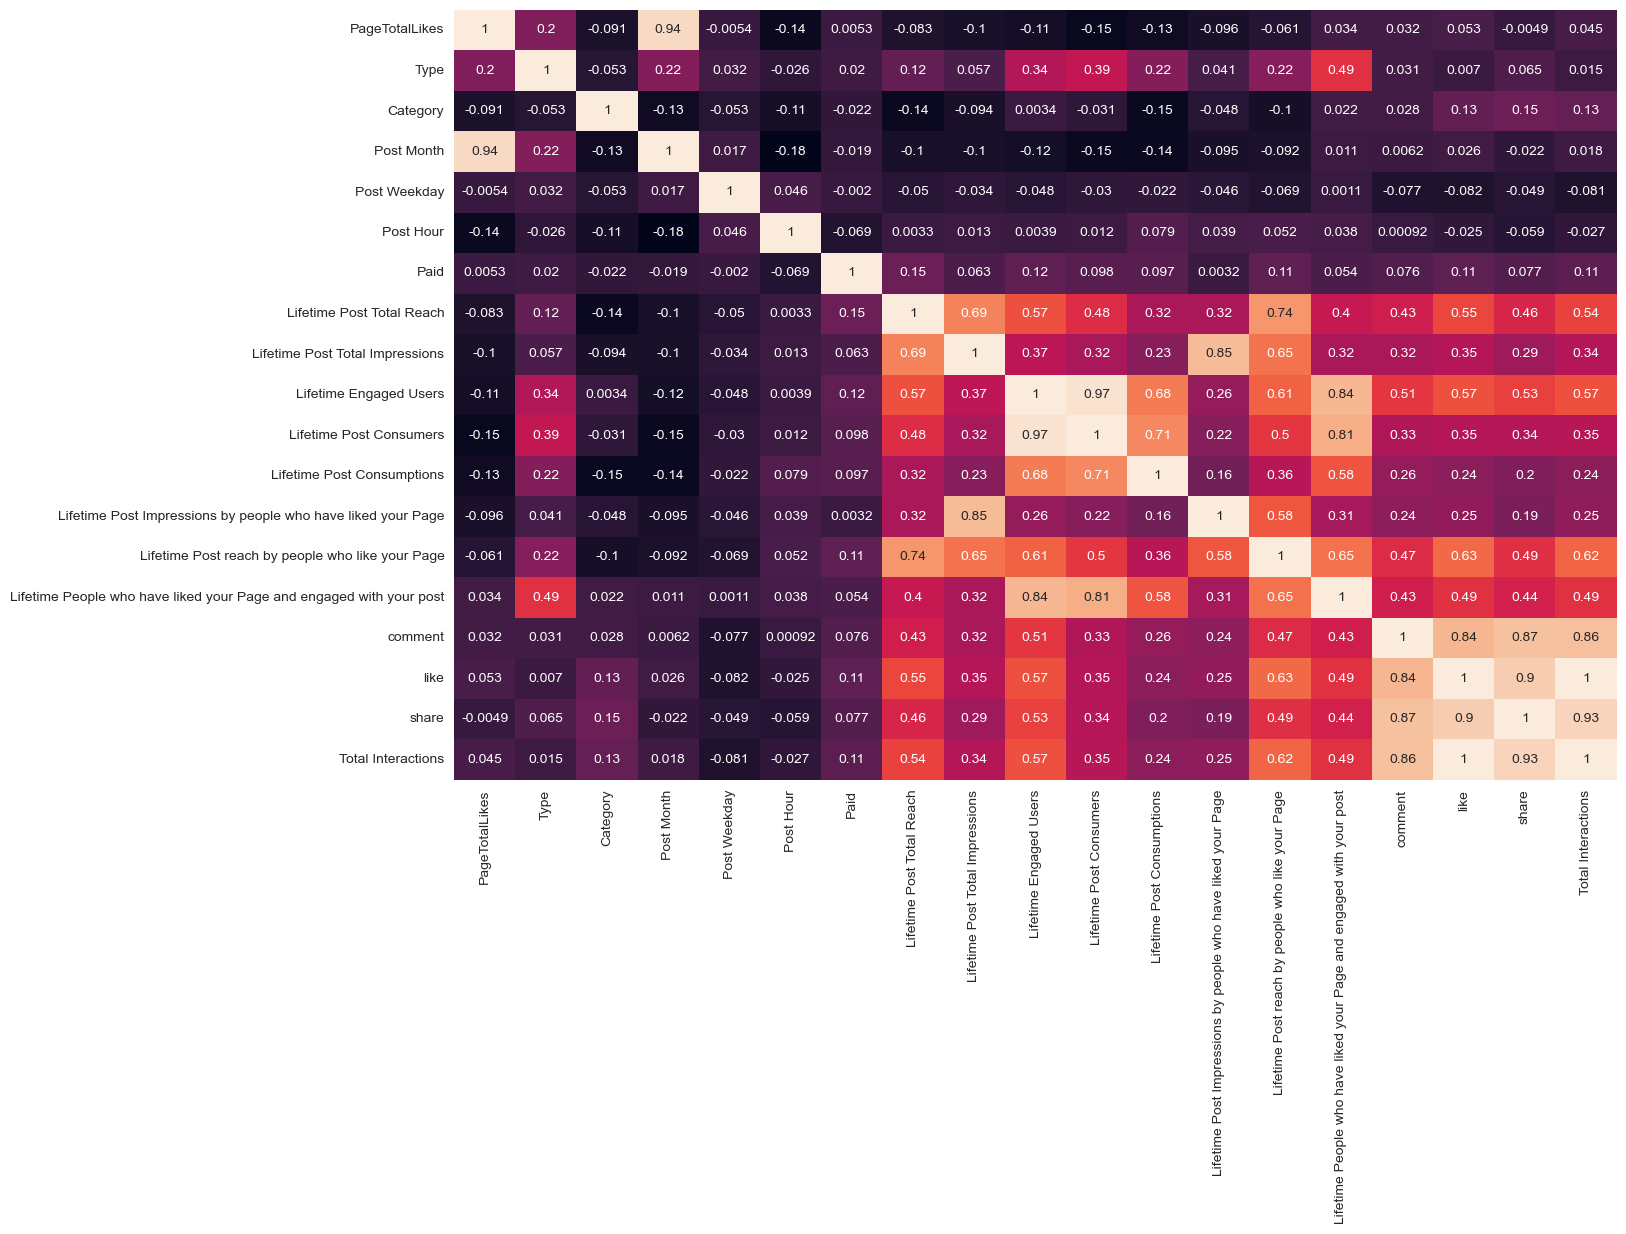

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cbar=False)

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # or any other classifier you are using

def print_metrics(y_test, y_pred):
    print("Percentage of Success Value: {}%".format(accuracy_score(y_test, y_train) * 100))
    print("Accuracy Value: {}".format(accuracy_score(y_test, y_train)))
    print('Precision: %.3f' % precision_score(y_test, y_train, average='weighted'))
    print('Recall: %.3f' % recall_score(y_test, y_train, average='weighted'))
    print('F1 Score: %.3f' % f1_score(y_test, y_train, average='weighted'))

# Call the function with y_test and y_pred
print_metrics(y_test, y_train)


NameError: name 'y_test' is not defined

In [60]:
print_metrics(df)

TypeError: print_metrics() missing 1 required positional argument: 'y_pred'

In [62]:

def plot_prediction_errors(X, y, 1):
    # Modelin tahminlerini yapma
    predictions = X.dot(theta).flatten()
    
    # Gerçek ve tahmin edilen değerler arasındaki farkları hesaplama
    prediction_errors = y - predictions
    
    # Grafikleme
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(prediction_errors)), prediction_errors, color='green')
    plt.xlabel('Örnek Numarası')
    plt.ylabel('Gerçek - Tahmin Edilen Değer')
    plt.title('Gerçek ve Tahmin Edilen Değerler Arasındaki Fark')
    plt.show()

SyntaxError: invalid syntax (871330120.py, line 1)

In [63]:

plot_prediction_errors(X,y)

NameError: name 'plot_prediction_errors' is not defined